Partner: Jakob Rissman, Jared McCrory

Date: 9/23/25

# Objectives
* To measure both of the slit widths in the double slit slide using
their respective single-slit diffraction patterns.
* To determine the laser wavelength using by fitting the Fraunhofer
model for two-slit interference to the observed intensity pattern.


# Install and import libraries

In [2]:
!pip install whit-phys-util 1>/dev/null

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import whit_phys_util as buc

Mounted at /content/drive


# Connect to GitHub

In [4]:
repo = buc.local_repository("https://github.com/PS251-FA25/two-slit-bright-1b")

Cloning repository from GitHub.


# Equipment

| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| Two-slit interference, one-photon-at-a-time apparatus | TeachSpin | TWS2-A | TWS 383 |
| multimeter | Fluke | 179 | 58870155 |
| T-shaped viewing card | Fluke | N/A | N/A |


# Slit-blocker positions
* Far slit unblocked: $3.50\mathrm{mm}$
* Both unblocked: $4.95\mathrm{mm}$
* Near slit unblocked: $5.30\mathrm{mm}$

In [5]:
distanceToDetector = 495
# distance from double slit in mm
# 5.83mm for detector slit


# Key landmarks in the interference pattern

Label | Location (mm) | Photodiode Voltage (V)
--- | --- | ---
$\mathrm{B_f}$ |5.43 |0.070
$\mathrm{1_f}$ |5.83 |2.298
$\mathrm{A_f}$ |6.23 |0.041
$0$ |683 |2.674
$\mathrm{A_n}$ |7.03 |0.051
$\mathrm{1_n}$ |7.43 |2.232
$\mathrm{B_n}$ |7.83 |0.122

The difference between $0$ and $1_n$ is the same as the distance between $0$ and $1_f$

In [6]:
centerLocation = 6.83 # position of central max in mm

# Import Data

In [7]:
repo.pull()

In [8]:
df_near = pd.read_excel("Two Slit Bright Data.xlsx", "Near Slit Only")
df_far = pd.read_excel("Two Slit Bright Data.xlsx", "Far Slit Only")
df_both = pd.read_excel("Two Slit Bright Data.xlsx", "Both Slits")

In [9]:
x_near = df_near['Location (mm)'] - centerLocation
x_far = df_far['Location (mm)'] - centerLocation
x_both = df_both['Location (mm)'] - centerLocation
V_near = df_near['Photodiode Voltage (V)']
V_far = df_far['Photodiode Voltage (V)']
V_both = df_both['Photodiode Voltage (V)']

# Single slit Diffraction

In [10]:
def I_ss(x, I0, a, x0):
  wavelength = 0.000670 # 670 nm converted to mm
  q = np.arctan((x-x0)/distanceToDetector)
  return I0*np.sinc(a*np.sin(q)/wavelength)**2

In [11]:
param_far, cov_far = curve_fit(I_ss, x_far, V_far, p0=[0.7,0.1,2.6])
fitTable_far = buc.fitTable(param_far,cov_far,paramLabels=['I_0', 'a', 'x_0'])
fitTable_far

,I_0,a,x_0
value,0.726154,0.090730,0.304403
uncertainty,0.001924,0.000642,0.012876


In [12]:
param_near, cov_near = curve_fit(I_ss, x_near, V_near, p0=[0.7,0.1,3])
fitTable_near = buc.fitTable(param_near,cov_near,paramLabels=['I_0', 'a', 'x_0'])
fitTable_near

,I_0,a,x_0
value,0.698750,0.088568,0.817213
uncertainty,0.001863,0.000614,0.013205


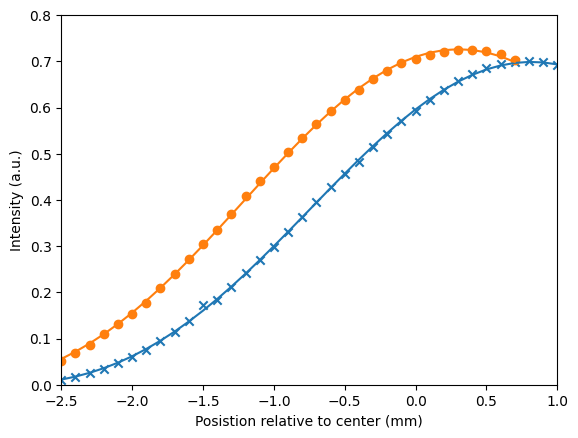

In [50]:
fig_ss, ax_ss = plt.subplots();
ax_ss.scatter(x_near, V_near, marker='x', label="Near Slit");
ax_ss.scatter(x_far, V_far, marker='o', label="Far Slit");
ax_ss.set_xlabel("Posistion relative to center (mm)");
ax_ss.set_ylabel("Intensity (a.u.)");
ax_ss.set_xlim(-2.5,1);
ax_ss.set_ylim(0,0.8);
ax_ss.plot(x_near, I_ss(x_near, *param_near));
ax_ss.plot(x_far, I_ss(x_far, *param_far));
fig_ss.savefig("Each_slit_bright.eps")

In [14]:
percentDiffWidth = (0.09073 - 0.08857)/((0.08857 + 0.09073)/2) * 100

In [15]:
percentDiffIntensity = (0.7262 - 0.6988)/((0.7262 + 0.6988)/2) * 100

In [16]:
(0.09073 - 0.08857)/((0.08857 + 0.09073)/2) * 100

2.4093697713329716

In [17]:
(0.7262 - 0.6988)/((0.7262 + 0.6988)/2) * 100

3.8456140350877166

## Fits results

### Far slit
* $I_0 = 0.7262 \pm 0.0019$
* $a = 0.09073 \pm 0.00064$
* $x_0 = 2.734 \pm 0.013$
* The 95% confidence interval for the slit width is 0.09009 to 0.09137 mm.

### Near slit
* $I_0 = 0.6988 \pm 0.0019$
* $a = 0.08857 \pm 0.00061$
* $x_0 = 3.247 \pm 0.013$
* The 95% confidence interval for the slit width is 0.08796 to 0.08918 mm.

### Comparison
* The slid width confidence intervals do not overlap and have a difference of about 0.001
* The slit widths differ by 2.4%
* The intensities differ by 3.8%

# Two-slit interference


In [18]:
def I_ts(x, I0, a, wavelength, x0, dI):
  d = 0.406 # mm
  q = np.arctan((x-x0)/distanceToDetector)
  I2s = I0*np.sinc(a*np.sin(q)/wavelength)**2*np.cos(np.pi*d*np.sin(q)/wavelength)**2
  return I2s + dI

In [19]:
wavelength = 0.000670 # 670 nm converted to mm
dI = 0.001

In [20]:
param_both, cov_both = curve_fit(I_ts, x_both, V_both, p0=[2.7, 0.1, 0.000670, 0, 0.001])
fitTable_both = buc.fitTable(param_both, cov_both, paramLabels=['I_0', 'a', 'lambda', 'x_0', 'DI'])
fitTable_both

,I_0,a,lambda,x_0,DI
value,2.592110,0.087508,0.000668,-0.181749,0.059063
uncertainty,0.036634,0.001563,0.000002,0.002280,0.019955


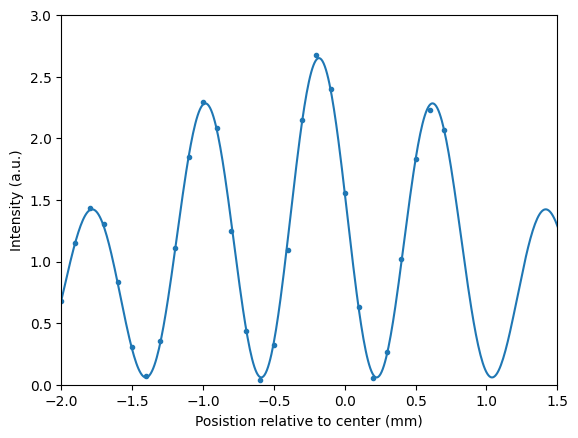

In [42]:
fig_ts, ax_ts = plt.subplots();
ax_ts.scatter(x_both, V_both, marker='.');
ax_ts.set_xlabel("Posistion relative to center (mm)");
ax_ts.set_ylabel("Intensity (a.u.)");
ax_ts.set_xlim(-2,1.5);
ax_ts.set_ylim(0,3);
x_fit = np.linspace(-2,2,500);
ax_ts.plot(x_fit, I_ts(x_fit, *param_both));
fig_ts.savefig("My_Combined_slits.eps");

The laser specifications were that its wavelength was between 665 and 675 nm. The calculated 95% confidence interval for the wavelength is 666 to 670 nm so this falls inside the specified range.

The manufacturer's specifications were that the slit width was 0.1 nm. The calculated 95% confidence interval for the slit width is .0860 to .0890 nm so this falls inside the specified range becaus the manufacturer only uses one sig fig with 0.1nm.